<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Statistical-Description" data-toc-modified-id="Statistical-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistical Description</a></span></li><li><span><a href="#Create-profile-of-whole-dataframe" data-toc-modified-id="Create-profile-of-whole-dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create profile of whole dataframe</a></span></li><li><span><a href="#Profile-of-two-variables" data-toc-modified-id="Profile-of-two-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Profile of two variables</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

import pandas_profiling

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 100)
# pd.set_option('display.float_format', '{:,.4g}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)


print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib,pandas_profiling]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1'), ('pandas_profiling', '2.3.0')]


# Load the data

In [2]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

# Statistical Description

In [3]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Create profile of whole dataframe

In [ ]:
profile = pandas_profiling.ProfileReport(df)

profile.to_file(output_file="../reports/html/pandas_profiling_report.html")

In [19]:
def show_method_attributes(method, ncols=2):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [I for I in dir(method) if I[0].islower()]
    x = [I for I in x if I not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [20]:
show_method_attributes(profile)

0                 1
0         description_set            sample
1         get_description             title
2  get_rejected_variables           to_file
3    get_unique_file_name           to_html
4                    html  use_local_assets
5             minify_html

In [27]:
profile.get_unique_file_name()

'profile_3541922209.html'

In [28]:
profile.get_description() # gives description of only one column

{'table': {'n': 21613,
  'nvar': 21,
  'memsize': 3631112,
  'recordsize': 168.00592236154168,
  'n_cells_missing': 0,
  'n_vars_with_missing': 0,
  'n_vars_all_missing': 0,
  'p_cells_missing': 0.0,
  'n_duplicates': 0,
  'p_duplicates': 0.0,
  'CAT': 1,
  'BOOL': 1,
  'NUM': 19,
  'DATE': 0,
  'URL': 0,
  'PATH': 0,
  'CONST': 0,
  'UNIQUE': 0,
  'UNSUPPORTED': 0,
  'CORR': 0,
  'RECODED': 0,
  'REJECTED': 0},
 'variables': {'bathrooms': {'value_counts_with_nan': 2.50    5380
   1.00    3852
   1.75    3048
   2.25    2047
   2.00    1930
   1.50    1446
   2.75    1185
   3.00     753
   3.50     731
   3.25     589
   3.75     155
   4.00     136
   4.50     100
   4.25      79
   0.75      72
   4.75      23
   5.00      21
   5.25      13
   0.00      10
   5.50      10
   1.25       9
   6.00       6
   0.50       4
   5.75       4
   8.00       2
   6.25       2
   6.50       2
   6.75       2
   7.50       1
   7.75       1
   Name: bathrooms, dtype: int64, 'value_counts_witho

In [5]:
!open ../reports/html/pandas_profiling_report.html

# Profile of two variables

In [11]:
profile2 = pandas_profiling.ProfileReport(pd.DataFrame(df[['sqft_living','price']]))

profile2

In [12]:
profile2.get_description()['table']

{'n': 21613,
 'nvar': 2,
 'memsize': 345936,
 'recordsize': 16.005922361541664,
 'n_cells_missing': 0,
 'n_vars_with_missing': 0,
 'n_vars_all_missing': 0,
 'p_cells_missing': 0.0,
 'n_duplicates': 2012,
 'p_duplicates': 0.0930921204830426,
 'CAT': 0,
 'BOOL': 0,
 'NUM': 2,
 'DATE': 0,
 'URL': 0,
 'PATH': 0,
 'CONST': 0,
 'UNIQUE': 0,
 'UNSUPPORTED': 0,
 'CORR': 0,
 'RECODED': 0,
 'REJECTED': 0}

In [13]:
pd.DataFrame(profile2.get_description()['table'],index=['sqft_living'])

n  nvar  memsize  recordsize  n_cells_missing  \
sqft_living  21613     2   345936   16.005922                0   

             n_vars_with_missing  n_vars_all_missing  p_cells_missing  \
sqft_living                    0                   0              0.0   

             n_duplicates  p_duplicates  CAT  BOOL  NUM  DATE  URL  PATH  \
sqft_living          2012      0.093092    0     0    2     0    0     0   

             CONST  UNIQUE  UNSUPPORTED  CORR  RECODED  REJECTED  
sqft_living      0       0            0     0        0         0

# Correlation

In [9]:
df[['sqft_living','price']].corr().style.background_gradient()

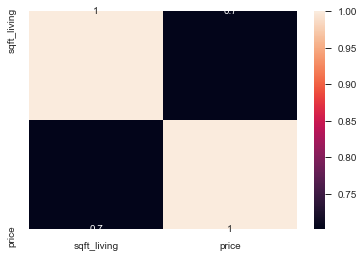

In [10]:
sns.heatmap(df['sqft_living price'.split()].corr(), annot=True)